<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/QCNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pennylane --upgrade

In [1]:
import os # To use the system comands in python
import matplotlib.pyplot as plt # plotting library
import numpy as np  #Numerical python liberary
import pandas as pd #Data handeling python module 
plt.style.use('seaborn')
import pennylane as qml 
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
images, labels = digits.data, digits.target
rng = np.random.default_rng()
features = images[np.where((labels == 0) | (labels == 1))]
labels = labels[np.where((labels == 0) | (labels == 1))]
train_indices = rng.choice(len(labels), 300, replace=False)
test_indices = rng.choice(np.setdiff1d(range(len(labels)), train_indices), 60, replace=False)
x_train, y_train = features[train_indices]/255, labels[train_indices]
x_test, y_test = features[test_indices]/255, labels[test_indices]


y_test = y_test*2-1
y_train = y_train*2-1


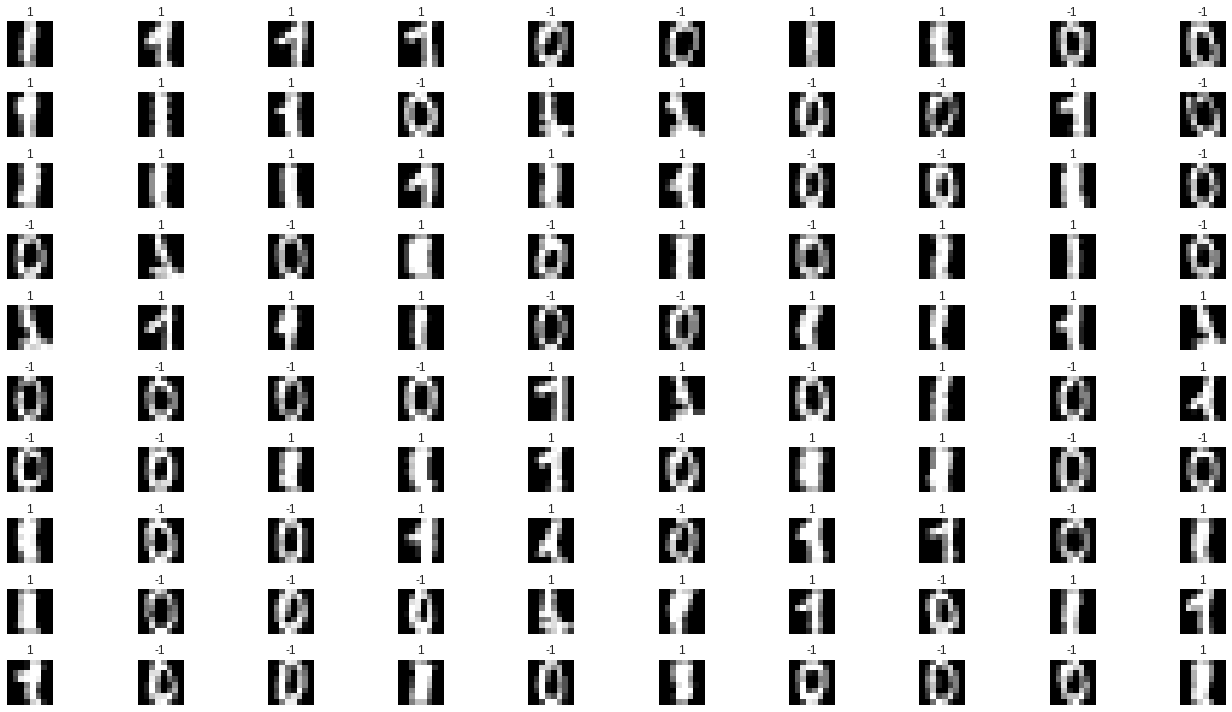

In [15]:
fig = plt.figure(figsize=(20,10))
for q in range(100):
  fig.add_subplot(10,10,q+1)
  plt.imshow(x_train[q].reshape(8,8),cmap='gray');
  plt.title(y_train[q])
  plt.axis('off')
  plt.tight_layout()


In [16]:
dev = qml.device("default.qubit",shots=1000, wires=8)
def layer(W):
  
    
    qml.CRZ(W[0], wires=[1,0])
    qml.CRX(W[1], wires=[1,0])
    qml.CRZ(W[2], wires=[3,2])
    qml.CRX(W[3], wires=[3,2])
    qml.CRZ(W[4], wires=[2,0])
    qml.CRX(W[5], wires=[2,0])

    qml.CRZ(W[6], wires=[5,4])
    qml.CRX(W[7], wires=[5,4])
    qml.CRZ(W[8], wires=[7,6])
    qml.CRX(W[9], wires=[7,6])
    qml.CRZ(W[10], wires=[6,4])
    qml.CRX(W[11], wires=[6,4])

    qml.CRZ(W[12], wires=[4,0])
    qml.CRX(W[13], wires=[4,0])
@qml.qnode(dev)
@qml.qnode(dev)
def circuit(weights, x):
    qml.AmplitudeEmbedding(features=x, wires=range(8), pad_with=0.,normalize=True)
    #qml.AngleEmbedding(features=x, wires=range(8), rotation='X')
    layer(weights)
      
    return qml.expval(qml.PauliZ(0))

In [4]:
num_qubits = 8
num_layers = 3
weights_init =  np.random.randn(14, requires_grad=True)#Initialize the weights


/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


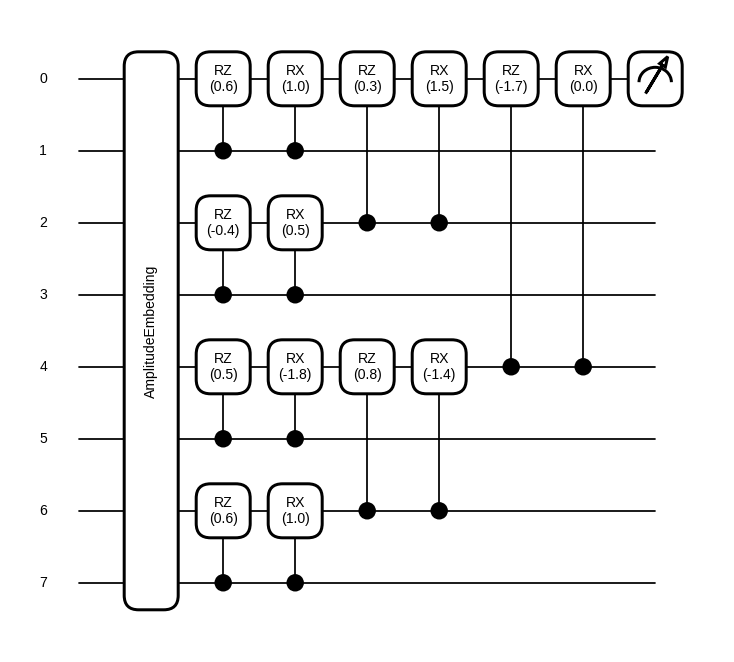

In [19]:
#plt.figure(figsize=(20,20));
fig, ax = qml.draw_mpl(circuit, decimals=1)(weights_init,x_train);


In [5]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p)**2

    loss = loss / len(labels)
    return loss
#define the cost to be minimized
def cost(weights,X, Y):
    predictions = [circuit(weights, x) for x in X]
    return square_loss(Y, predictions) #returns the mean squared loss     

In [30]:
#Train the model

epoch = 20 
weights = weights_init
X = x_train
Y = y_train
opt = AdamOptimizer(0.1)
batch_size = 10
loss = []
for q in range(epoch):
    index = np.random.randint(0, len(X), (batch_size,)) #catch random features from the batch size 
    X_batch = X[index]
    Y_batch = Y[index]
    weights,_, _ = opt.step(cost, weights, X_batch, Y_batch)
    predictions = [np.sign(circuit(weights, x)) for x in X]
    #Val = [np.sign(circuit(weights, x)) for x in X_val] #validation set if needed
    loss.append(cost(weights,X, Y))
    print("Epoch: {}  |   Cost: {:0.7f} ".format(q + 1, cost(weights,X, Y)))

Epoch: 1  |   Cost: 1.1887037 
Epoch: 2  |   Cost: 1.1349113 
Epoch: 3  |   Cost: 1.1166929 
Epoch: 4  |   Cost: 1.1014063 
Epoch: 5  |   Cost: 1.0751353 
Epoch: 6  |   Cost: 1.0654890 
Epoch: 7  |   Cost: 1.0535047 
Epoch: 8  |   Cost: 1.0311618 
Epoch: 9  |   Cost: 1.0129431 
Epoch: 10  |   Cost: 1.0120145 
Epoch: 11  |   Cost: 0.9958326 
Epoch: 12  |   Cost: 0.9887441 
Epoch: 13  |   Cost: 0.9807778 
Epoch: 14  |   Cost: 0.9859004 
Epoch: 15  |   Cost: 0.9701608 
Epoch: 16  |   Cost: 0.9683388 
Epoch: 17  |   Cost: 0.9607157 
Epoch: 18  |   Cost: 0.9508675 
Epoch: 19  |   Cost: 0.9466966 
Epoch: 20  |   Cost: 0.9334348 


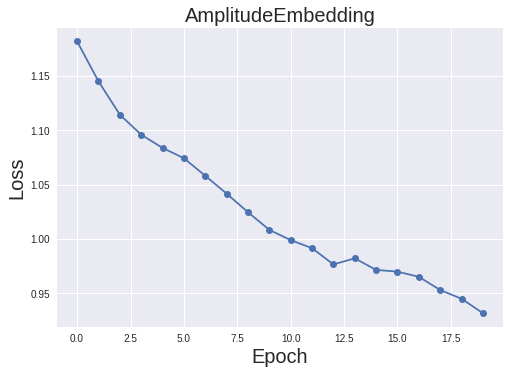

In [31]:
plt.plot(loss,'-o');
plt.xlabel('Epoch',fontsize=20);
plt.ylabel('Loss',fontsize=20);
plt.title('AmplitudeEmbedding',fontsize=20);

# Predictions

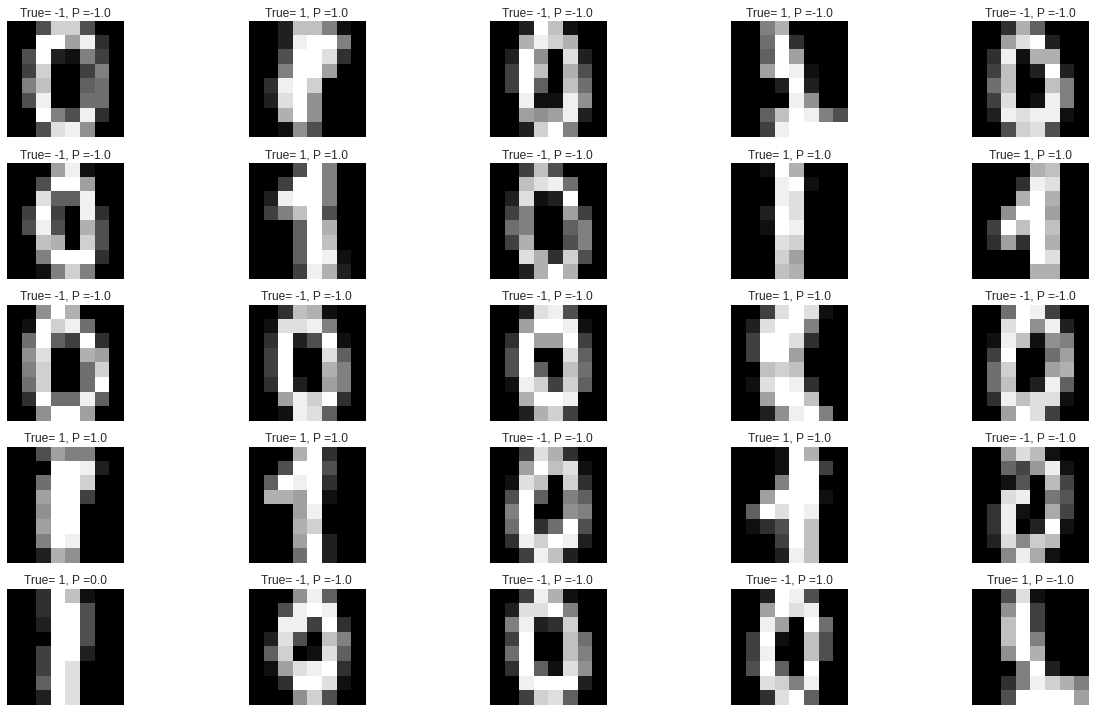

In [33]:
fig = plt.figure(figsize=(20,10))
for q in range(25):
  fig.add_subplot(5,5,q+1)
  plt.imshow(x_test[q].reshape(8,8),cmap='gray');
  plt.title('True= {}, P ={}'.format(y_test[q],np.sign(circuit(weights, x_test[q])) ))
  plt.axis('off')
  plt.tight_layout()


# Angle Embedding with PCA

In [6]:
dev1 = qml.device("default.qubit",shots=1000, wires=8)
def layer(W):
  
    
    qml.CRZ(W[0], wires=[1,0])
    qml.CRX(W[1], wires=[1,0])
    qml.CRZ(W[2], wires=[3,2])
    qml.CRX(W[3], wires=[3,2])
    qml.CRZ(W[4], wires=[2,0])
    qml.CRX(W[5], wires=[2,0])

    qml.CRZ(W[6], wires=[5,4])
    qml.CRX(W[7], wires=[5,4])
    qml.CRZ(W[8], wires=[7,6])
    qml.CRX(W[9], wires=[7,6])
    qml.CRZ(W[10], wires=[6,4])
    qml.CRX(W[11], wires=[6,4])

    qml.CRZ(W[12], wires=[4,0])
    qml.CRX(W[13], wires=[4,0])
@qml.qnode(dev1)
@qml.qnode(dev1)
def circuit(weights, x):
    qml.AngleEmbedding(features=x, wires=range(8), rotation='X')
    layer(weights)
      
    return qml.expval(qml.PauliZ(0))

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=8)
x1_train = pca.fit_transform(x_train)

In [9]:
x1_train.shape

(300, 8)

In [ ]:
#Train the model

epoch = 20 
weights = weights_init
X = x1_train
Y = y_train
opt = AdamOptimizer(0.1)
batch_size = 10
loss = []
for q in range(epoch):
    index = np.random.randint(0, len(X), (batch_size,)) #catch random features from the batch size 
    X_batch = X[index]
    Y_batch = Y[index]
    weights,_, _ = opt.step(cost, weights, X_batch, Y_batch)
    predictions = [np.sign(circuit(weights, x)) for x in X]
    #Val = [np.sign(circuit(weights, x)) for x in X_val] #validation set if needed
    loss.append(cost(weights,X, Y))
    print("Epoch: {}  |   Cost: {:0.7f} ".format(q + 1, cost(weights,X, Y)))